In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Feature_Engineered_Dataset.csv')
df.head()

,Year,Real_GDP_Ksh,Population_Growth,Female_Labor_Participation,Male_Labor_Participation,Education_Expenditure_Ksh,Inflation,Dollar_Rate,Total_Unemployment,Labor_Total_Population_Ratio,Urban_Population_Growth_Income_Per_Capita_Growth_Ratio
0,2000,982855,2.92,50.46,46.89,4.914291e+10,9.98,76.175542,3.13,0.920229,1.030328
1,2001,1020111,3.03,50.03,46.87,5.154121e+10,5.73,78.563195,3.07,0.924819,1.050862
2,2002,1025583,3.03,49.61,46.84,5.949633e+10,1.97,78.749142,3.09,0.923703,1.055151
3,2003,1055658,2.97,49.18,46.82,7.552908e+10,9.81,84.148300,3.04,0.921479,1.039266
4,2004,1109338,2.99,48.76,46.79,8.157499e+10,11.80,80.650112,3.00,0.918978,1.043338


In [4]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]), '\n')
print('There are {} duplicates.'.format(df.duplicated().sum()), '\n')
print('There are {} missing values.'.format(df.isnull().sum().sum()))

The dataset has 23 rows and 11 columns. 

There are 0 duplicates. 

There are 0 missing values.


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Year                                                    23 non-null     int64  
 1   Real_GDP_Ksh                                            23 non-null     int64  
 2   Population_Growth                                       23 non-null     float64
 3   Female_Labor_Participation                              23 non-null     float64
 4   Male_Labor_Participation                                23 non-null     float64
 5   Education_Expenditure_Ksh                               23 non-null     float64
 6   Inflation                                               23 non-null     float64
 7   Dollar_Rate                                             23 non-null     float64
 8   Total_Unemployment                        

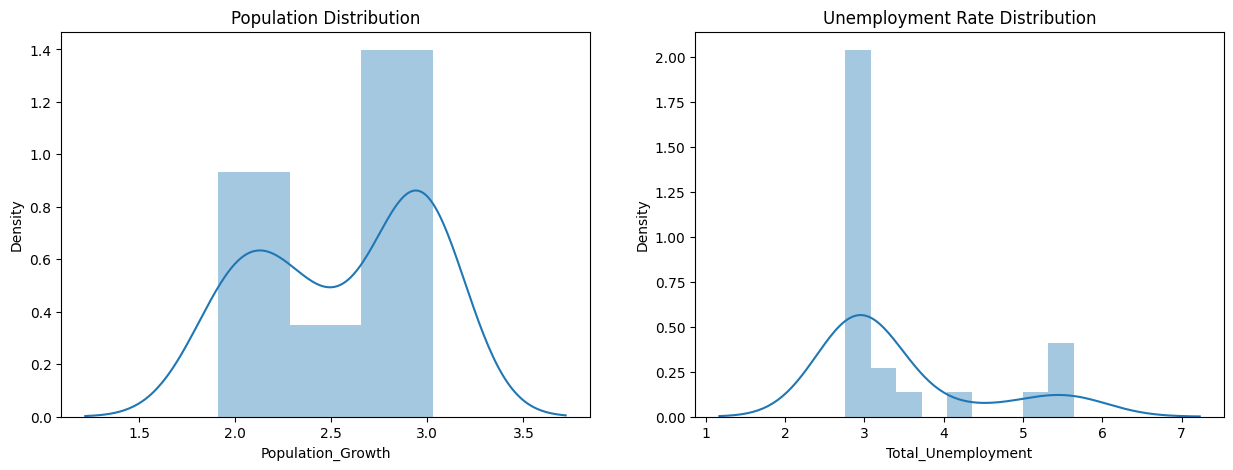

In [6]:
# Visualizing population and unemployment rate
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Population_Growth'])
plt.title('Population Distribution')
plt.subplot(1, 2, 2)
sns.distplot(df['Total_Unemployment'])
plt.title('Unemployment Rate Distribution')
plt.show();

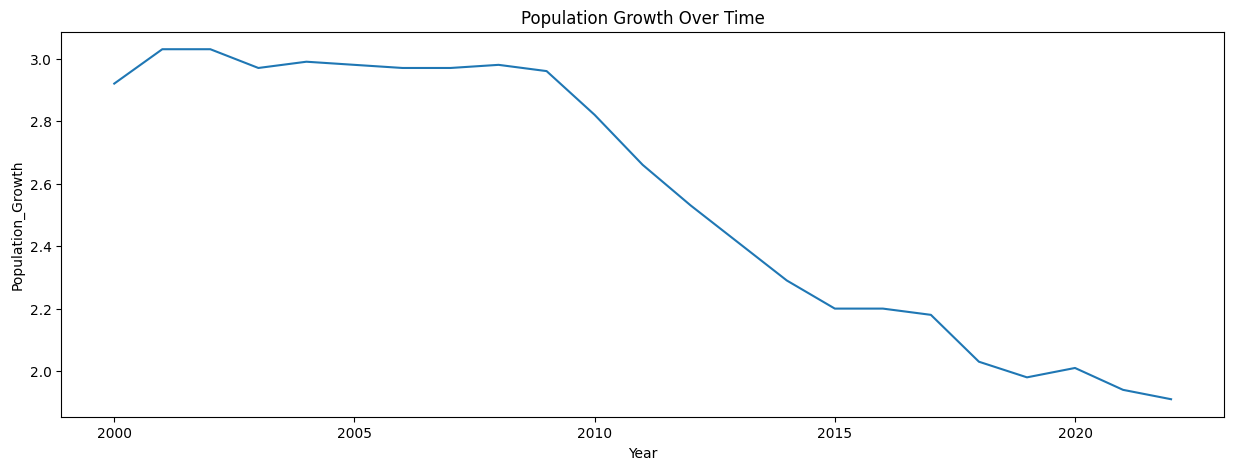

In [7]:
# Population growth over time
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Population_Growth', data=df)
plt.title('Population Growth Over Time')
plt.show();

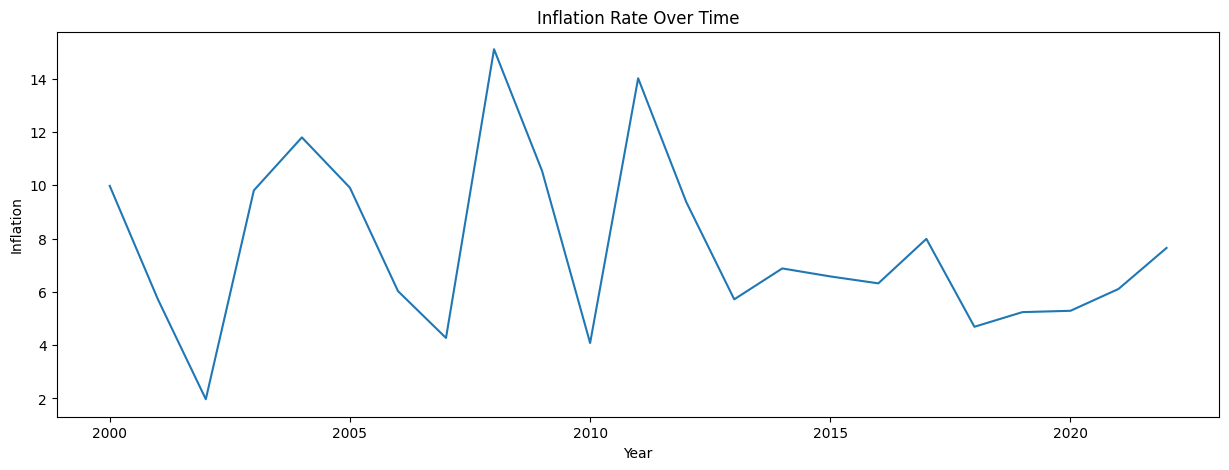

In [8]:
# Inflation rate over time
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Inflation', data=df)
plt.title('Inflation Rate Over Time')
plt.show();

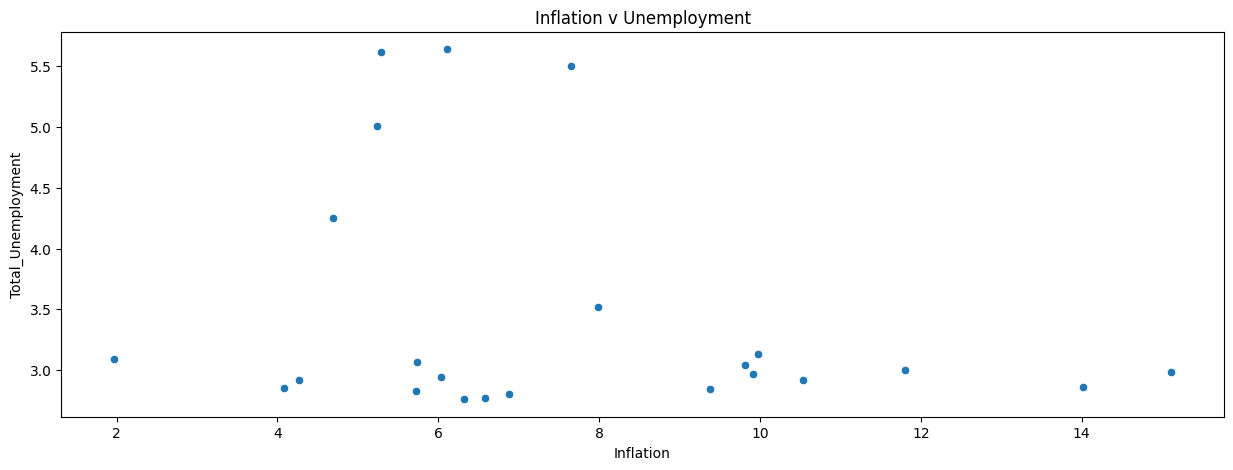

In [9]:
# Inflation v unemployment
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Inflation', y='Total_Unemployment', data=df)
plt.title('Inflation v Unemployment')
plt.show();

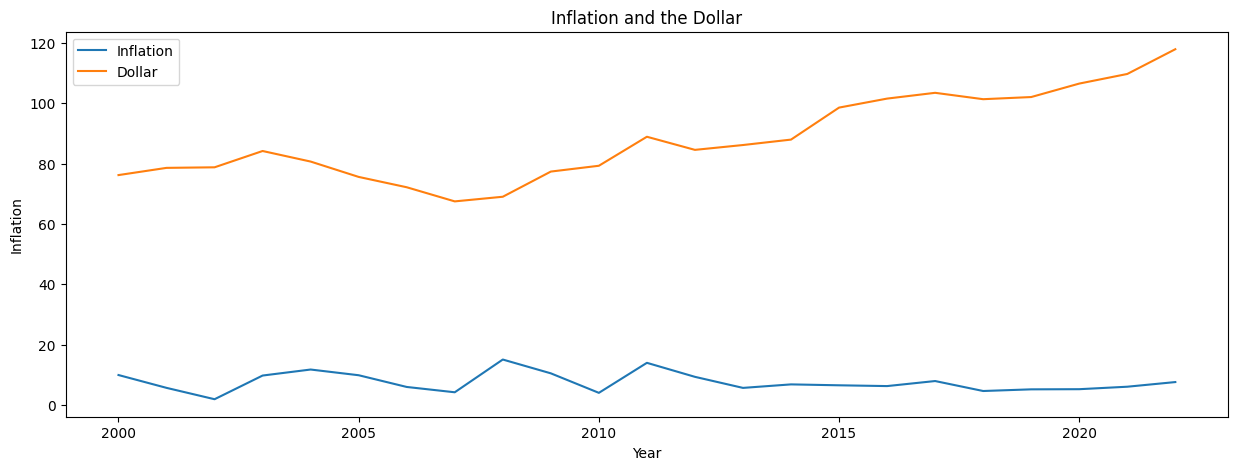

In [11]:
# Inflation and the dollar
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Inflation', data=df, label='Inflation')
sns.lineplot(x='Year', y='Dollar_Rate', data=df, label='Dollar')
plt.title('Inflation and the Dollar')
plt.show();

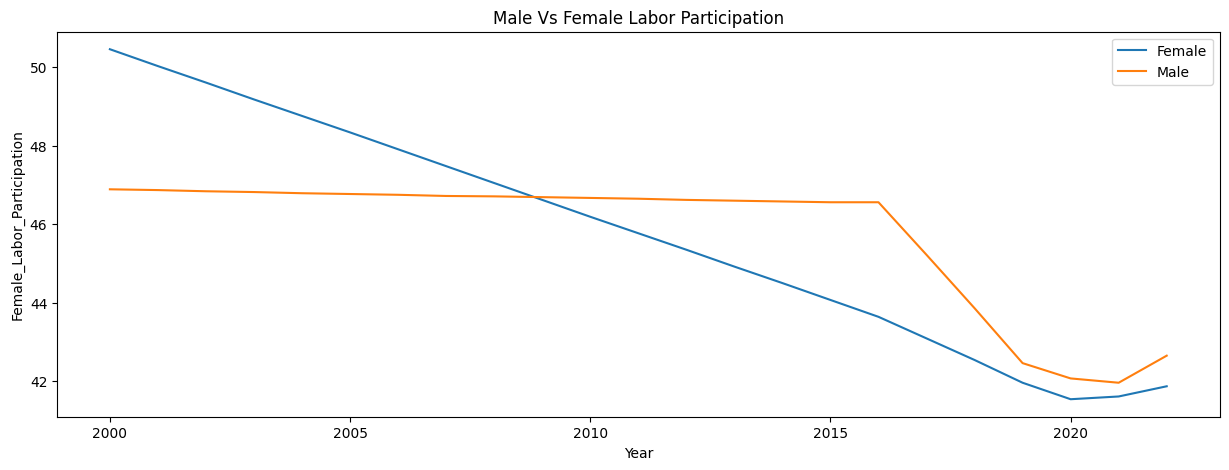

In [14]:
# Female v Male Labour Force Participation
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Female_Labor_Participation', label='Female', data=df)
sns.lineplot(x='Year', y='Male_Labor_Participation', label='Male', data=df)
plt.title('Male Vs Female Labor Participation')
plt.show();

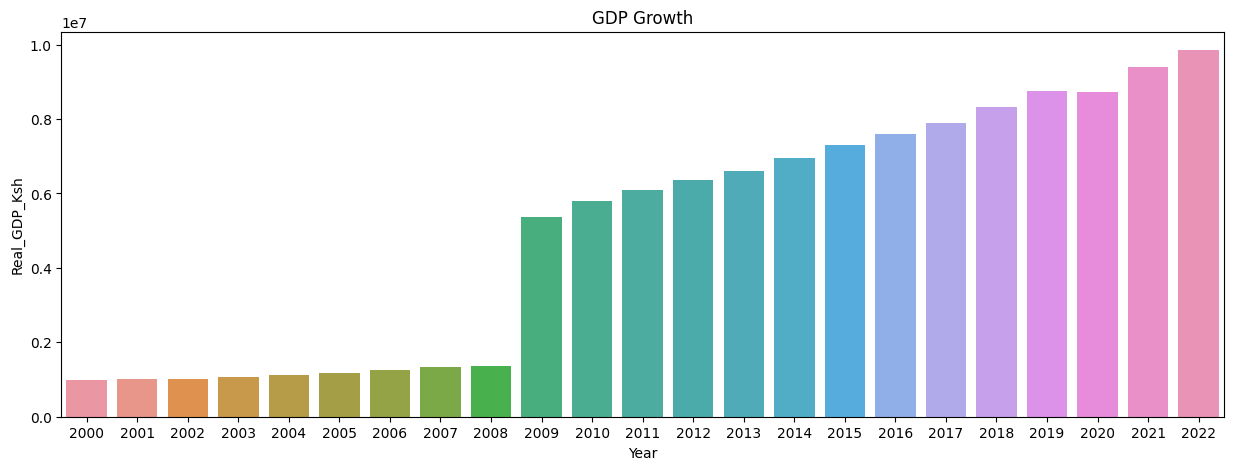

In [18]:
# GDP Growth
plt.figure(figsize=(15, 5))
sns.barplot(x='Year', y='Real_GDP_Ksh', data=df)
plt.title('GDP Growth')
plt.show();

In [20]:
corr = df.corr()
corr

,Year,Real_GDP_Ksh,Population_Growth,Female_Labor_Participation,Male_Labor_Participation,Education_Expenditure_Ksh,Inflation,Dollar_Rate,Total_Unemployment,Labor_Total_Population_Ratio,Urban_Population_Growth_Income_Per_Capita_Growth_Ratio
Year,1.000000,0.958278,-0.949936,-0.997229,-0.783145,0.855113,-0.222906,0.866087,0.676683,0.599325,-0.826015
Real_GDP_Ksh,0.958278,1.000000,-0.938077,-0.956271,-0.708740,0.825043,-0.240873,0.874588,0.597949,0.537302,-0.829863
Population_Growth,-0.949936,-0.938077,1.000000,0.950202,0.793354,-0.864708,0.299956,-0.932283,-0.695958,-0.721325,0.845177
Female_Labor_Participation,-0.997229,-0.956271,0.950202,1.000000,0.786193,-0.884954,0.234257,-0.856210,-0.673330,-0.579727,0.848788
Male_Labor_Participation,-0.783145,-0.708740,0.793354,0.786193,1.000000,-0.678050,0.284686,-0.800162,-0.981433,-0.804742,0.705676
Education_Expenditure_Ksh,0.855113,0.825043,-0.864708,-0.884954,-0.678050,1.000000,-0.291694,0.743914,0.545905,0.469383,-0.903552
Inflation,-0.222906,-0.240873,0.299956,0.234257,0.284686,-0.291694,1.000000,-0.238518,-0.256000,-0.328731,0.215224
Dollar_Rate,0.866087,0.874588,-0.932283,-0.856210,-0.800162,0.743914,-0.238518,1.000000,0.743674,0.832779,-0.757718
Total_Unemployment,0.676683,0.597949,-0.695958,-0.673330,-0.981433,0.545905,-0.256000,0.743674,1.000000,0.823253,-0.607461
Labor_Total_Population_Ratio,0.599325,0.537302,-0.721325,-0.579727,-0.804742,0.469383,-0.328731,0.832779,0.823253,1.000000,-0.480865


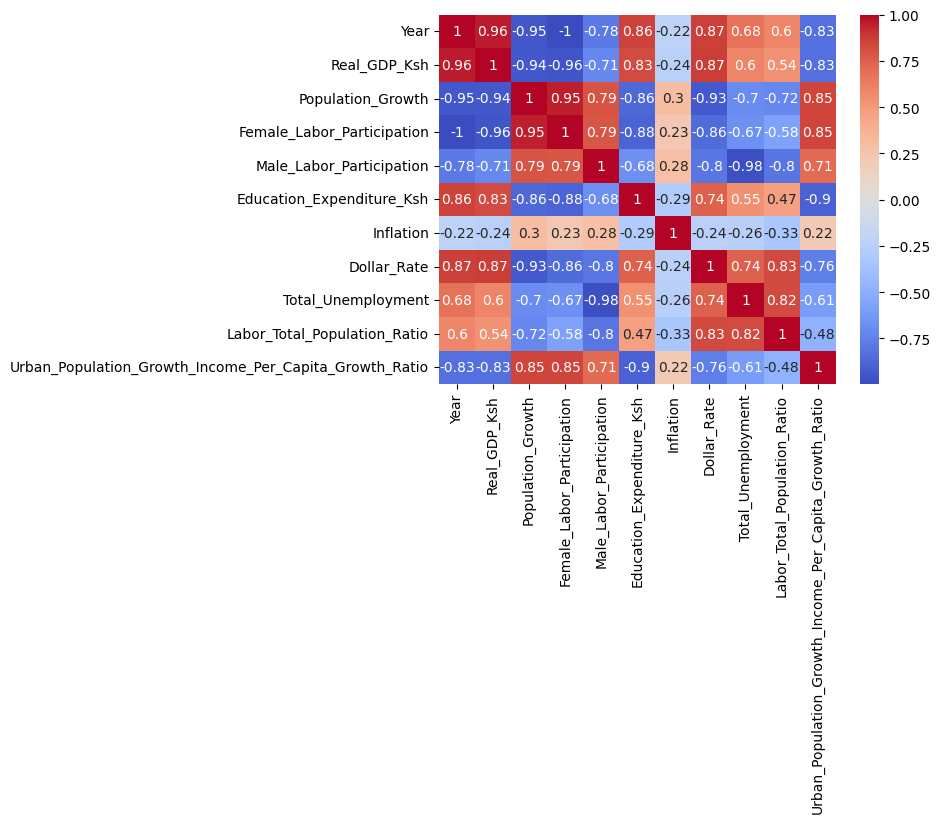

In [21]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show();

In [22]:
# Pick the top 10 features
top_10 = corr.index[abs(corr['Total_Unemployment']) > 0.5]

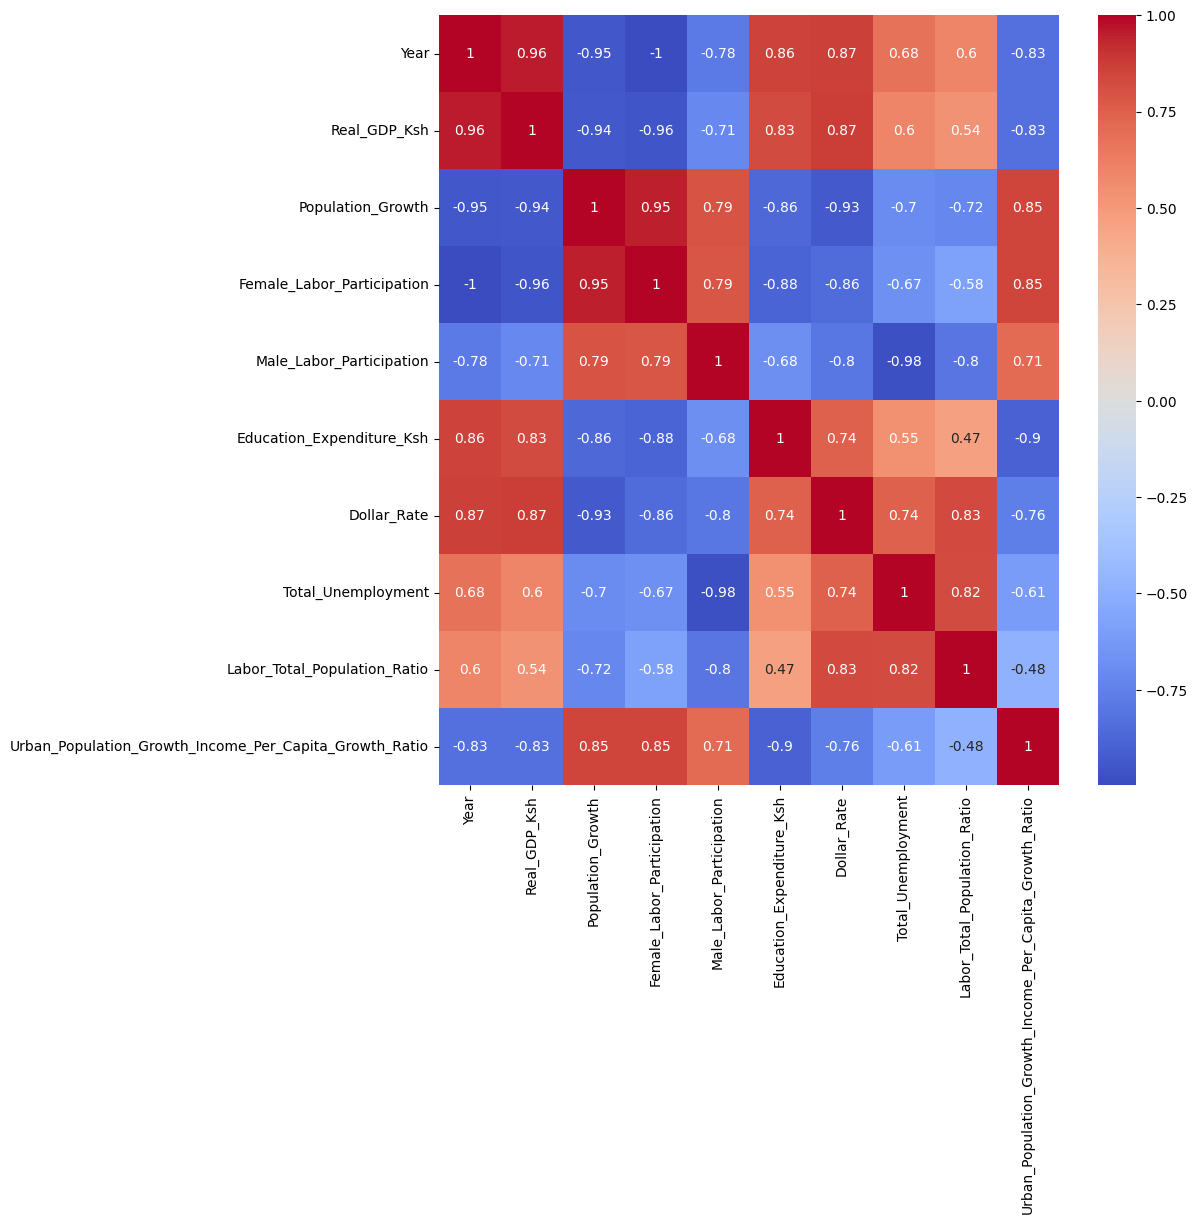

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[top_10].corr(), annot=True, cmap='coolwarm')
plt.show();

In [24]:
top_10

Index(['Year', 'Real_GDP_Ksh', 'Population_Growth',
       'Female_Labor_Participation', 'Male_Labor_Participation',
       'Education_Expenditure_Ksh', 'Dollar_Rate', 'Total_Unemployment',
       'Labor_Total_Population_Ratio',
       'Urban_Population_Growth_Income_Per_Capita_Growth_Ratio'],
      dtype='object')

# Model Building

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR

Linear Regression
RMSE:  3.1866939237501577e-11
MAE:  2.9344260354946525e-11
R2:  1.0


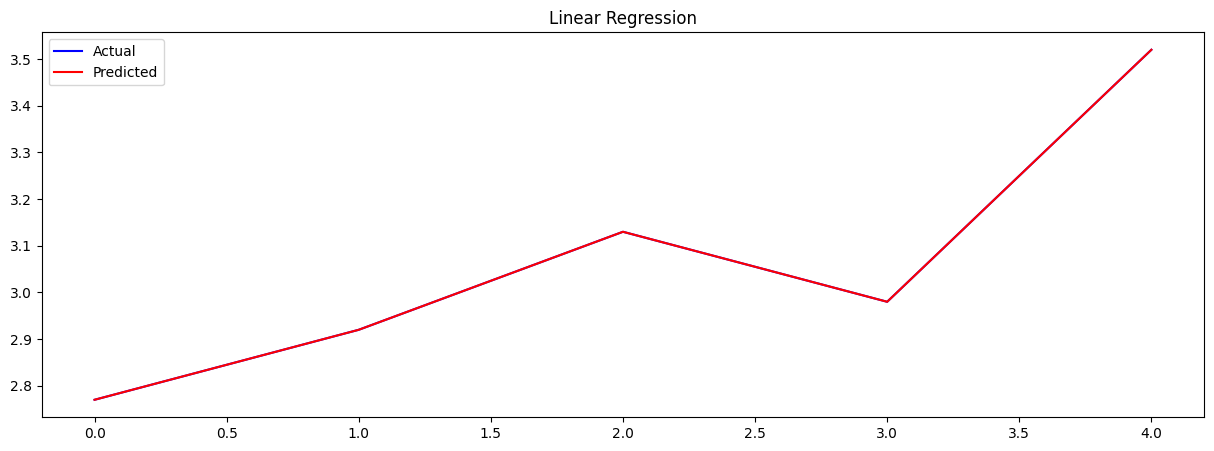

In [28]:
# We will use the top 10 features
X = df[top_10]
y = df['Total_Unemployment']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print('Linear Regression')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('MAE: ', mean_absolute_error(y_test, lr_pred))
print('R2: ', r2_score(y_test, lr_pred))

# Visualizing the predictions
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(lr_pred, color='red', label='Predicted')
plt.title('Linear Regression')
plt.legend()
plt.show();

Lasso
RMSE:  0.798172759576166
MAE:  0.6682468311821315
R2:  -8.755600792132672


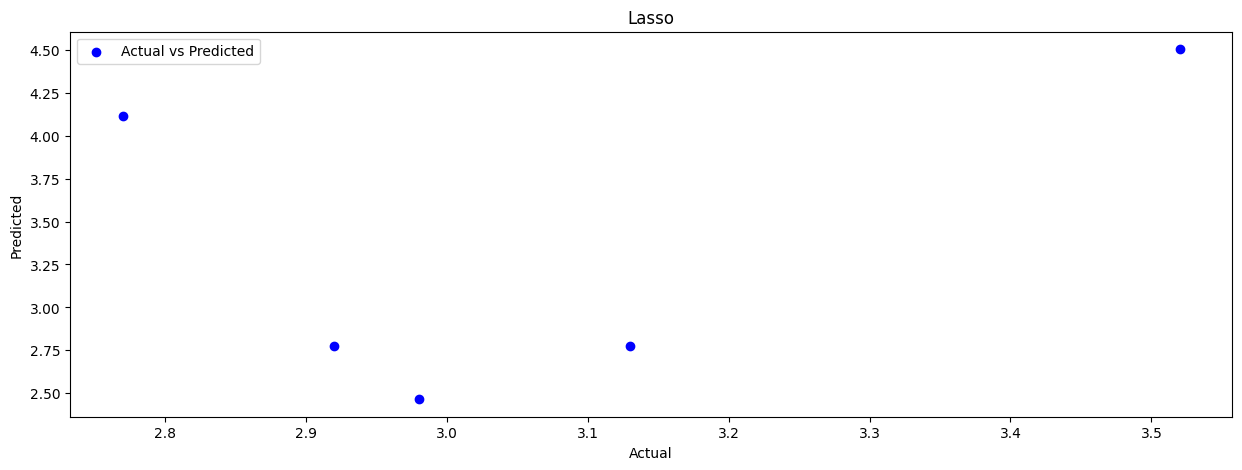

In [30]:
# Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

print('Lasso')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lasso_pred)))
print('MAE: ', mean_absolute_error(y_test, lasso_pred))
print('R2: ', r2_score(y_test, lasso_pred))

# Visualizing the predictions
plt.figure(figsize=(15, 5))
plt.scatter(y_test, lasso_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso')
plt.legend()
plt.show();

Ridge
RMSE:  0.1002912692559211
MAE:  0.09550196684395003
R2:  0.8459766830674436


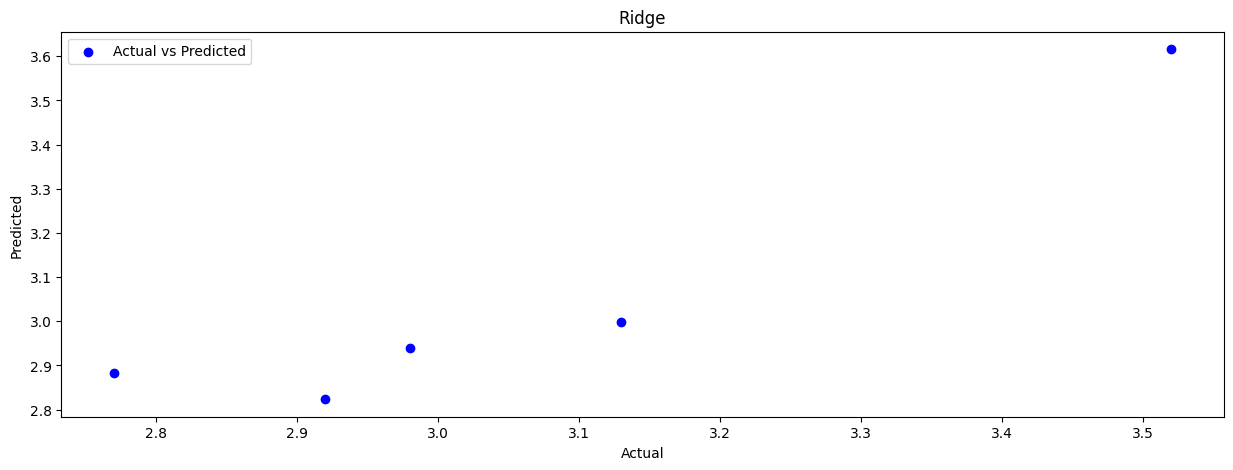

In [31]:
# Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print('Ridge')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, ridge_pred)))
print('MAE: ', mean_absolute_error(y_test, ridge_pred))
print('R2: ', r2_score(y_test, ridge_pred))

# Visualizing the predictions
plt.figure(figsize=(15, 5))
plt.scatter(y_test, ridge_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge')
plt.legend()
plt.show();

Random Forest
RMSE:  0.10650400931420377
MAE:  0.09220000000000032
R2:  0.8263030748499326


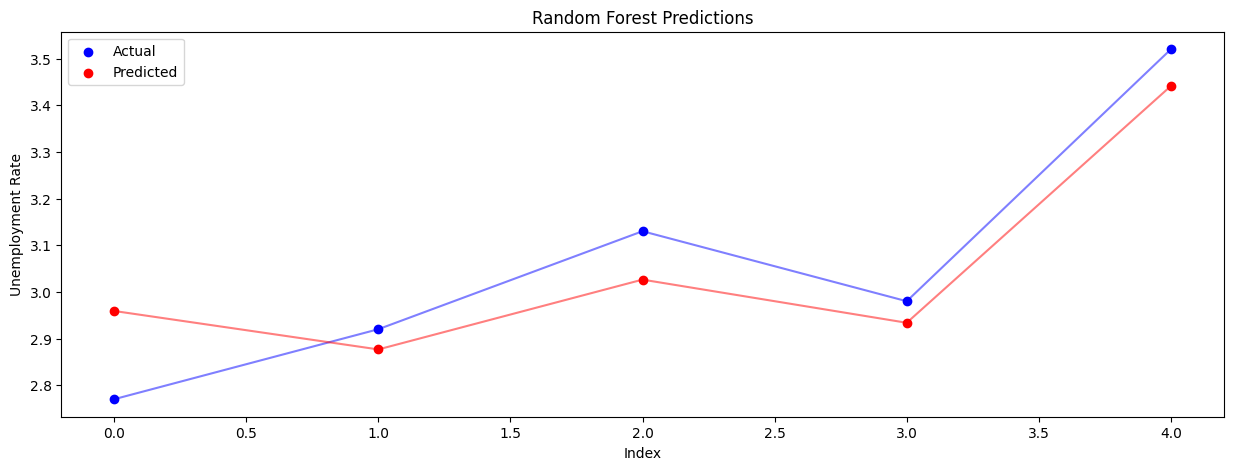

In [32]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print('Random Forest')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('MAE: ', mean_absolute_error(y_test, rf_pred))
print('R2: ', r2_score(y_test, rf_pred))

# Visualizing the predictions
# Visualizing the predictions
plt.figure(figsize=(15, 5))

# Scatter plot
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(rf_pred)), rf_pred, color='red', label='Predicted')

# Line plot
plt.plot(y_test.values, color='blue', alpha=0.5)
plt.plot(rf_pred, color='red', alpha=0.5)

plt.title('Random Forest Predictions')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show();

Gradient Boosting
RMSE:  0.2056237014533986
MAE:  0.1266578365450756
R2:  0.3525495130559172


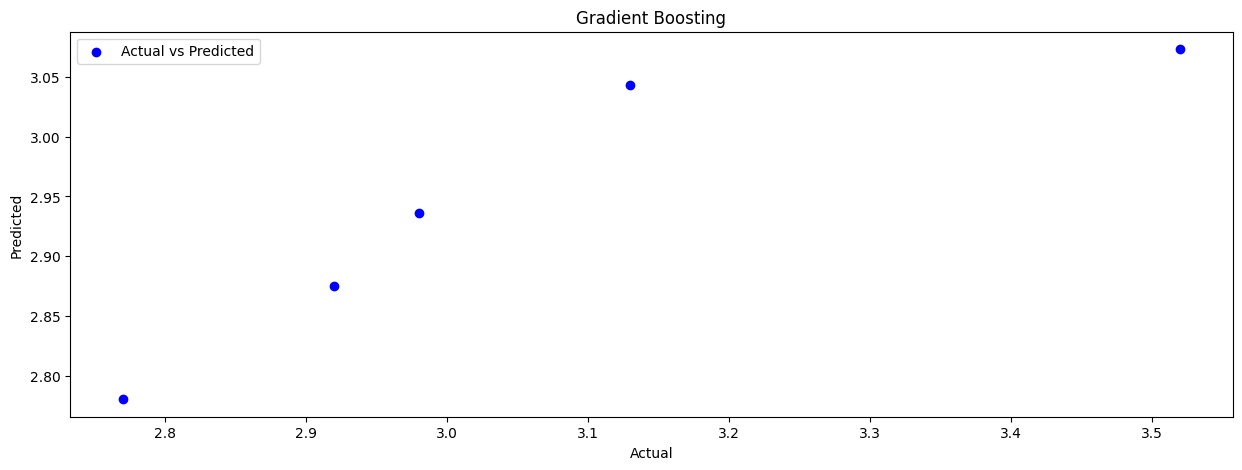

In [33]:
# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

print('Gradient Boosting')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, gb_pred)))
print('MAE: ', mean_absolute_error(y_test, gb_pred))
print('R2: ', r2_score(y_test, gb_pred))

# Visualizing the predictions
plt.figure(figsize=(15, 5))
plt.scatter(y_test, gb_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting')
plt.legend()
plt.show();

XGBoost
RMSE:  0.32327385364135036
MAE:  0.1570994434356689
R2:  -0.6002998966086179


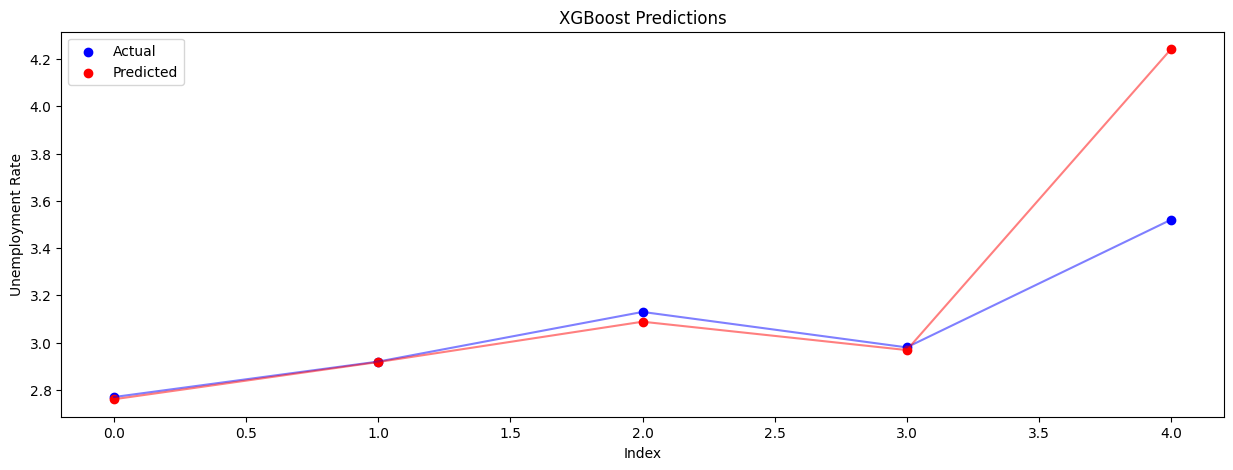

In [34]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print('XGBoost')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('MAE: ', mean_absolute_error(y_test, xgb_pred))
print('R2: ', r2_score(y_test, xgb_pred))

# Visualizing the predictions
plt.figure(figsize=(15, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(xgb_pred)), xgb_pred, color='red', label='Predicted')
plt.plot(y_test.values, color='blue', alpha=0.5)
plt.plot(xgb_pred, color='red', alpha=0.5)
plt.title('XGBoost Predictions')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show();